<a href="https://colab.research.google.com/github/PavaniMaganti/bankruptcy-prediction-ml-model/blob/main/Machine_learning_on_Cloud_Bankruptcy_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Success or Bankruptcy of Companies-Machine Learning: An Application on Company_House_Info Dataset**


# Identifying an Opportunity and doing Exploratory Data Analysis

# **Introduction**

The exploratory study on the Company_House_Info dataset is to classify companies as bankrupt or nonbankrupt with a view to gaining an in-depth insight into the financial status of the companies. These critical patterns and relationship discoveries may contribute toward better feature selection, where useful insights in model training could be availed.

The analysis done below identifies the importance of financial metrics such as ROA(A) and Liability to Equity in the forecast of bankruptcy. We can identify significant correlations, important trends, and finally grouped businesses based on their financial activity that provides a strong foundation for model training. The knowledge gained here will drive effective feature selection and preprocessing techniques that ensure accurate and reliable forecasts in later stages.

# Data analysis
Following the loading of the dataset, an initial exploration was conducted into it by doing the following:

**Data View:**

A view of the first few rows gives insight into what the general structure and contents of the dataset are.

**Descriptive statistics:**

It focus on the distributions and variability, producing statistical summaries-mean, median, and standard deviation-for each attribute.

**Key Takeaway:**

From the descriptive statistics, some of the financial ratios like ROA(A) and Net Income to Stockholder's Equity were some of the indicators in determining the viability of a company.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr

In [ ]:
# Load your dataset
data = pd.read_csv("/content/Company_House_Info.csv")

In [ ]:
print(data.head())

   Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.4577

# Descriptive Statistics

In [ ]:
print("Descriptive Statistics:")
print(data_cleaned.describe())


Descriptive Statistics:
         Bankrupt?  ROA(C) before interest and depreciation before interest  \
count  5734.000000                                        5734.000000         
mean      0.035054                                           0.504736         
std       0.183933                                           0.061249         
min       0.000000                                           0.000000         
25%       0.000000                                           0.475845         
50%       0.000000                                           0.501852         
75%       0.000000                                           0.535307         
max       1.000000                                           0.971530         

       ROA(A) before interest and % after tax  \
count                             5734.000000   
mean                                 0.557845   
std                                  0.066790   
min                                  0.000000   
25%                

In [ ]:
# Clean column names
data.columns = data.columns.str.strip()

# Convert columns to numeric where possible
data_cleaned = data.apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
data_cleaned = data_cleaned.dropna()


# Correlation Analysis

A correlation matrix was developed describing the character's relationships and its relationship with the goal variable - Bankrupt?.It identified the top ten characteristics that were associated with bankruptcy, providing considerable insight into which financial metrics most accurately predict outcome.

**Key Takeaway:**

Factors like ROA(A) before interest, % after tax, and Liability to Equity showed a very strong correlation and hence were very important in identifying failing businesses.






Top 10 Features Correlated with Bankruptcy:
Bankrupt?                              1.000000
Debt ratio %                           0.249940
Current Liability to Assets            0.193385
Current Liability to Current Assets    0.170295
Borrowing dependency                   0.169401
Liability to Equity                    0.160742
Current Liability to Equity            0.145829
Current Liabilities/Equity             0.145829
Liability-Assets Flag                  0.140478
Equity to Long-term Liability          0.137724
Name: Bankrupt?, dtype: float64


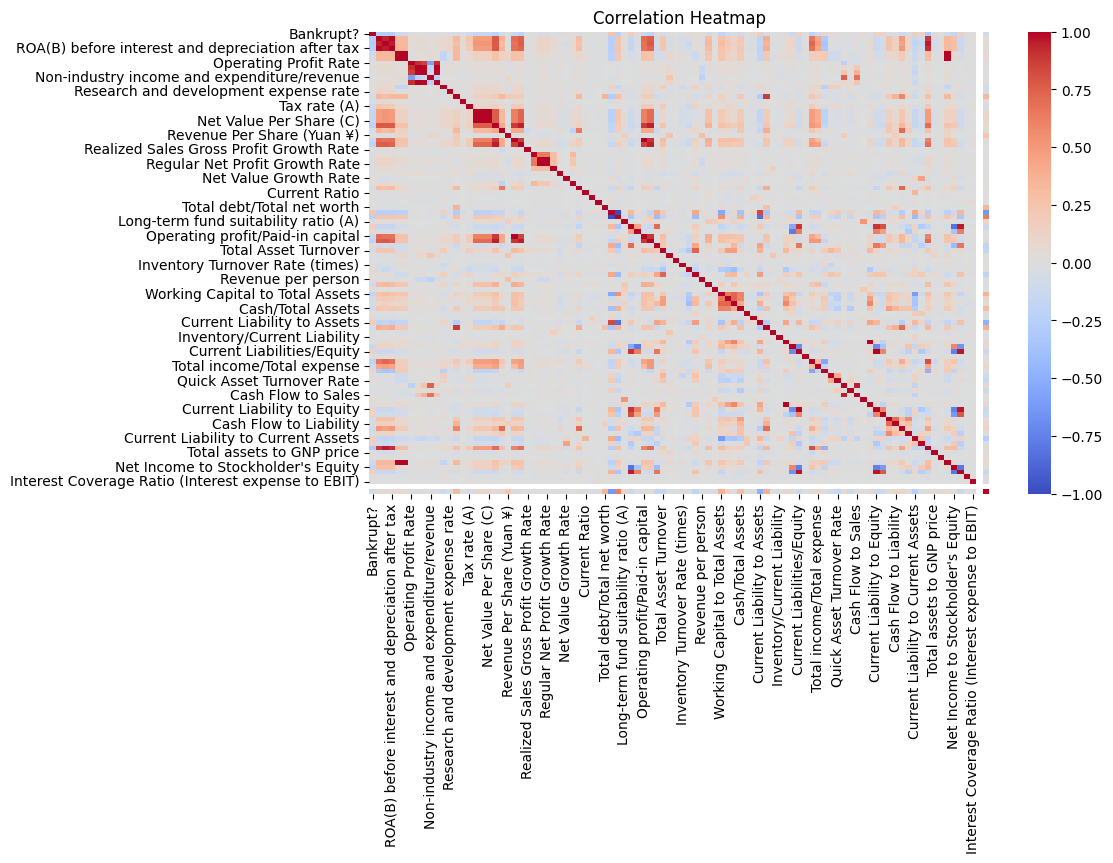

In [ ]:
# Compute Correlation Matrix
correlation_matrix = data_cleaned.corr()

# Top 10 correlated features
print("\nTop 10 Features Correlated with Bankruptcy:")
print(correlation_matrix["Bankrupt?"].sort_values(ascending=False).head(10))

# Heatmap for Correlation
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


# Scatter Plot for Key Variables
Visualize relationships between specific features and the target variable.
A scatter plot was done in order to assess the relationship between ROA(A) versus net income to shareholders' equity for bankrupt versus non-bankrupt enterprises.
These bankrupt enterprises really display some evidence of clustering with less ROA (A) value, therefore reflecting its predictive importance.


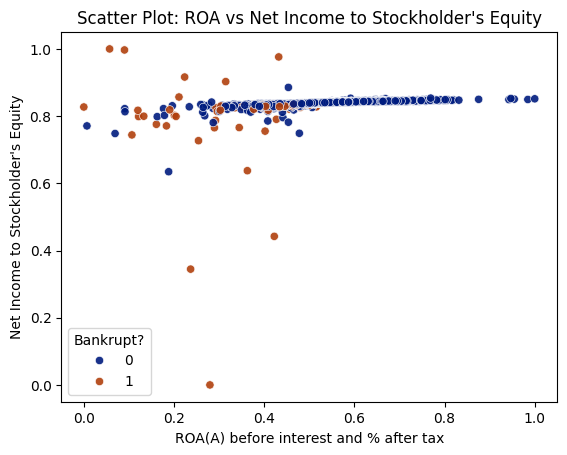

In [ ]:
sns.scatterplot(
    x=data_cleaned["ROA(A) before interest and % after tax"],
    y=data_cleaned["Net Income to Stockholder's Equity"],
    hue=data_cleaned["Bankrupt?"],
    palette="dark",  # Use a darker palette
    alpha=0.9        # Reduce transparency for darker points
)
plt.title("Scatter Plot: ROA vs Net Income to Stockholder's Equity")
plt.xlabel("ROA(A) before interest and % after tax")
plt.ylabel("Net Income to Stockholder's Equity")
plt.legend(title="Bankrupt?")
plt.show()


# K-Means Clustering
Cluster the data into groups using selected key features.Using Clustering to find Opportunities

**Feature Selection:** The main features selected were the ones that are relevant to bankruptcy. These are ROA(A), Liability to Equity, and Net Income to Stockholder's Equity.

**Scaling:** The data was standardized so that the features were on the same scale for clustering methods.

**K-Means Clustering:** With three clusters in K-Means, similar companies have been grouped together that show different patterns of financial risk.

**Key Takeaway:**
In the different financial behavior patterns obtained by clustering, it showed better deployment of resources with better methodologies in terms of risk management.


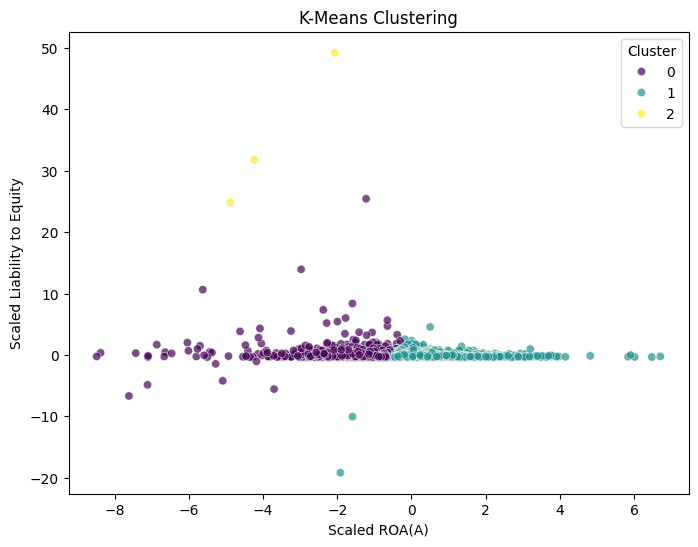

In [ ]:
# Select key features
key_features = [
    "ROA(A) before interest and % after tax",
    "Liability to Equity",
    "Net Income to Stockholder's Equity"
]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_cleaned[key_features])

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
data_cleaned["Cluster"] = clusters

# Visualize Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_scaled[:, 0],
    y=X_scaled[:, 1],
    hue=clusters,
    palette="viridis",
    alpha=0.7
)
plt.title("K-Means Clustering")
plt.xlabel("Scaled ROA(A)")
plt.ylabel("Scaled Liability to Equity")
plt.legend(title="Cluster")
plt.show()


# Elbow Method for Optimal Clusters
Determines the best number of clusters by analyzing inertia values.Elbow Method for Optimal Clusters the following is how the Elbow method was conducted for finding the optimal number of clusters Inertia, or within-cluster sum of squares, was plotted for 1 to 10 clusters. The "elbow point" identified at 3 clusters lends credibility to a three-cluster business categorization of low, medium, and high-risk.

**Key Insight:** Optimal clustering increases resolution among risk classes and therefore enables more appropriately targeted interventions.

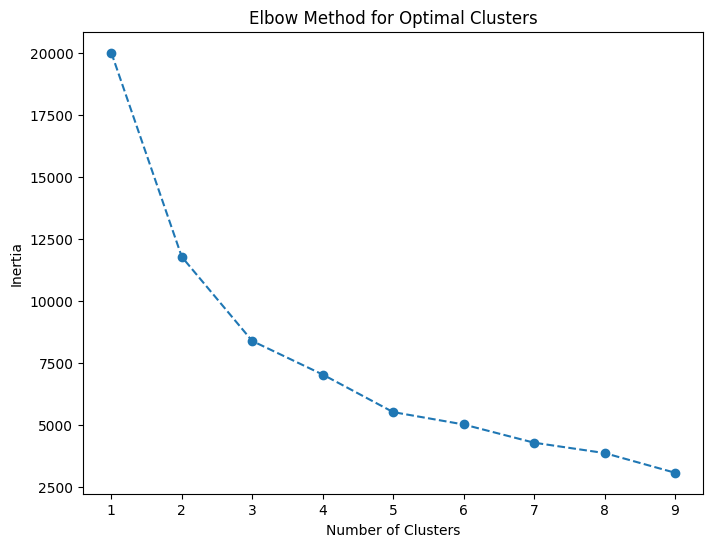

In [ ]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 10), inertia, marker='o', linestyle='--')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()


# Pearson Correlation
Calculate correlation and p-values for key features against the target variable.Features and Bankruptcy Relationships following are the correlations of bankruptcy with some characteristics. These were further supported as their values showed significant correlation with ROA(A) and Liability to Equity.

**Key Takeaway:** These characteristics provide the features with statistical importance for bankruptcy prediction and at the same time are consonant with financial theory.




In [ ]:
for feature in key_features:
    correlation, p_value = pearsonr(data_cleaned[feature], data_cleaned["Bankrupt?"])
    print(f"Pearson Correlation between {feature} and Bankruptcy: {correlation:.2f} (p-value: {p_value:.2e})")


Pearson Correlation between ROA(A) before interest and % after tax and Bankruptcy: -0.29 (p-value: 5.25e-125)
Pearson Correlation between Liability to Equity and Bankruptcy: 0.17 (p-value: 8.00e-43)
Pearson Correlation between Net Income to Stockholder's Equity and Bankruptcy: -0.18 (p-value: 2.37e-50)


# **Data Preprocessing**
Data preprocessing is a critical step in preparing raw data for machine learning models. Proper preprocessing ensures that models can accurately learn from the data, reducing noise, handling inconsistencies, and improving performance. In this task, we perform essential preprocessing steps, including data cleaning, outlier detection, normalization, and feature selection, to create a robust dataset for model training.

**1. Handling Missing Values During Preprocessing - Bankruptcy Prediction Problem**

The preprocessing identified and treated the missing values to make sure consistency and completeness of data are maintained. While missing values in the categorical fields were imputed with their mode, missing values in numerical columns were imputed with their mean values. This approach ensures that no biases are introduced due to missing data, and the statistical integrity of the dataset is preserved. The distribution of the target variable has been viewed as a bar plot in which it was shown that the instances "Not Bankrupt" were dominating.

**2. Outlier Detection and Removal**

Numerical features outliers were detected using the IQR method and then capped to reduce their influence on model performance. A boxplot of numerical variables was drawn. It is very important to manage these outliers, since too many of them introduce bias and may reduce the generalization capability while training a model.


**3. Feature Normalisation**

Normalization of numeric features using MinMaxScaler scales the features in a range between 0 and 1. This, in return, improves the convergence rates since this helps reduce biases due to different scales. Now all the features would contribute equally in model training. The histogram plotted for the distribution of normalized features showed the increase in consistency of the features.


**4. Feature Transformation**

Logarithmic and Yeo-Johnson were applied to highly biased features with the aim of reducing their skewness. The pre-processing result should reduce the impact of extreme values on the model performance without distorting the prediction pattern. Calculation of skew values before and after transformation is done to validate this process.

**5. Feature Selection**

A correlation heatmap was generated to analyze relationships between features and the target variable. Features with a correlation threshold greater than 0.1 with the target variable were selected for further processing. This step ensured that only the most relevant predictors, such as Operating Gross Margin and ROA(C), were retained for building a robust model.

**6. Data Splitting**

The dataset was split into training (70%), validation (15%), and testing (15%) sets to ensure fair and objective evaluation of model performance. Stratified sampling preserved the class distribution, particularly addressing the class imbalance issue, ensuring the model was trained and validated on representative subsets of the data.

This comprehensive preprocessing pipeline laid the foundation for building a reliable machine learning model, ensuring data quality, minimizing biases, and enhancing generalization capabilities for bankruptcy prediction.





# Data Cleaning


In [ ]:
missing_values = df.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)
# Handle missing values (if any)
df.fillna(df.mean(), inplace=True)
print("\nMissing Values After Handling:")
print(df.isnull().sum())


Missing Values in Each Column:
Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

Missing Values After Handling:
Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation af

In [ ]:
# Fill missing numeric values with the mean
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill missing categorical values with the mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

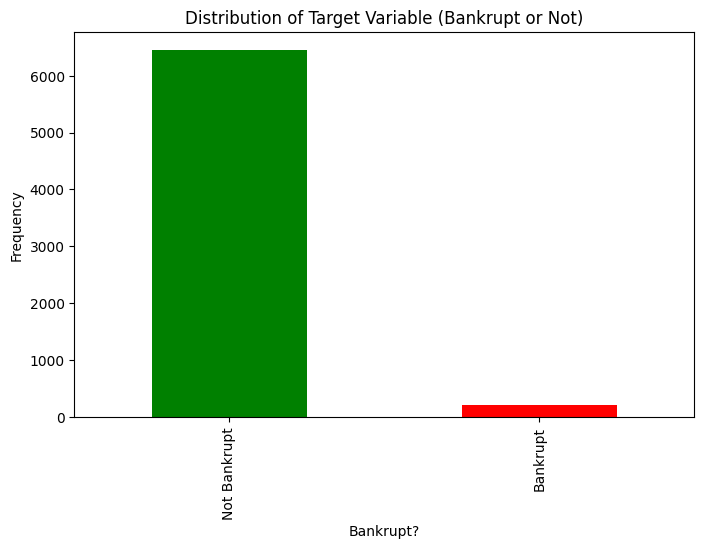

In [ ]:
# Analyze the distribution of the target variable
y_distribution = df["Bankrupt?"].value_counts()
plt.figure(figsize=(8, 5))
y_distribution.plot(kind="bar", color=["green", "red"])
plt.title("Distribution of Target Variable (Bankrupt or Not)")
plt.xlabel("Bankrupt?")
plt.ylabel("Frequency")
plt.xticks(ticks=[0, 1], labels=["Not Bankrupt", "Bankrupt"])
plt.show()

In [ ]:
# Strip leading/trailing spaces from column names
df.columns = df.columns.str.strip()
# Verify column names
print("Column Names:\n", df.columns)

Column Names:
 Index(['Bankrupt?', 'ROA(C) before interest and depreciation before interest',
       'ROA(A) before interest and % after tax',
       'ROA(B) before interest and depreciation after tax',
       'Operating Gross Margin', 'Realized Sales Gross Margin',
       'Operating Profit Rate', 'Pre-tax net Interest Rate',
       'After-tax net Interest Rate',
       'Non-industry income and expenditure/revenue',
       'Continuous interest rate (after tax)', 'Operating Expense Rate',
       'Research and development expense rate', 'Cash flow rate',
       'Interest-bearing debt interest rate', 'Tax rate (A)',
       'Net Value Per Share (B)', 'Net Value Per Share (A)',
       'Net Value Per Share (C)', 'Persistent EPS in the Last Four Seasons',
       'Cash Flow Per Share', 'Revenue Per Share (Yuan ¥)',
       'Operating Profit Per Share (Yuan ¥)',
       'Per Share Net profit before tax (Yuan ¥)',
       'Realized Sales Gross Profit Growth Rate',
       'Operating Profit Growth Ra

# *Exploratory Data Analysis (EDA)*

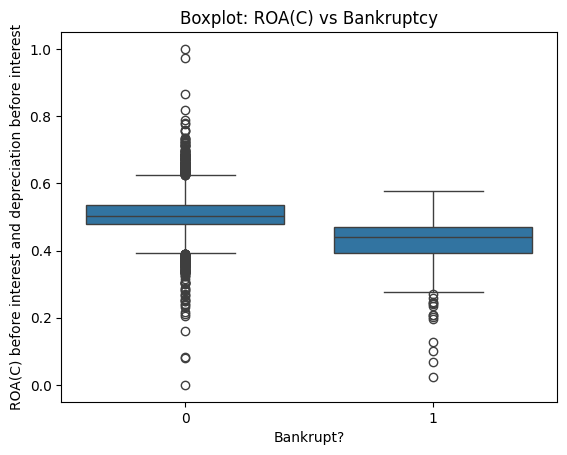

In [ ]:
# Analyze relationships between key features and the target
sns.boxplot(x="Bankrupt?", y="ROA(C) before interest and depreciation before interest", data=df)
plt.title("Boxplot: ROA(C) vs Bankruptcy")
plt.show()

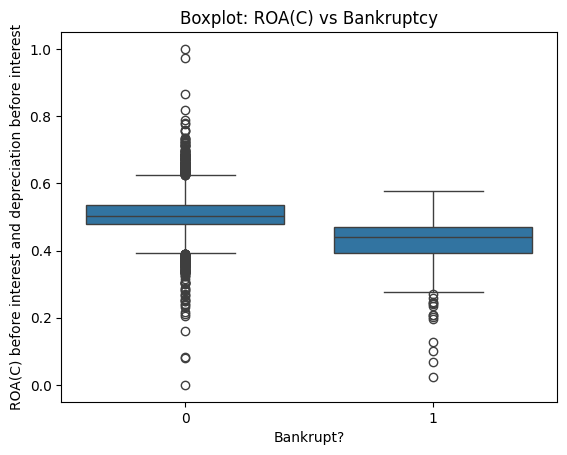

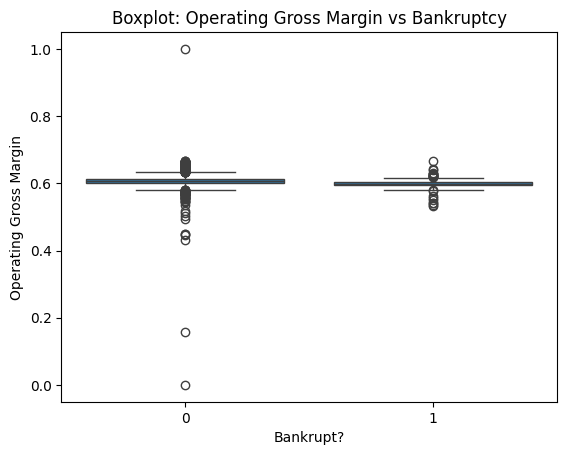

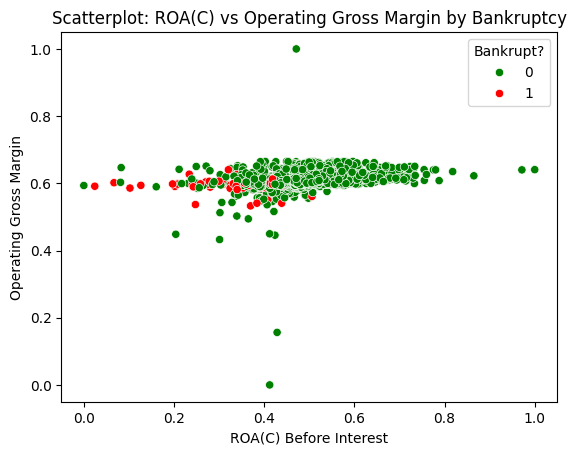

In [ ]:
#Analyze relationships between key features and the target
sns.boxplot(x="Bankrupt?", y="ROA(C) before interest and depreciation before interest", data=df)
plt.title("Boxplot: ROA(C) vs Bankruptcy")
plt.show()
sns.boxplot(x="Bankrupt?", y="Operating Gross Margin", data=df)
plt.title("Boxplot: Operating Gross Margin vs Bankruptcy")
plt.show()
sns.scatterplot(x="ROA(C) before interest and depreciation before interest",
                y="Operating Gross Margin",
                hue="Bankrupt?",
                palette={0: "green", 1: "red"},
                data=df)
plt.title("Scatterplot: ROA(C) vs Operating Gross Margin by Bankruptcy")
plt.xlabel("ROA(C) Before Interest")
plt.ylabel("Operating Gross Margin")
plt.show()

# Outlier detection and removal

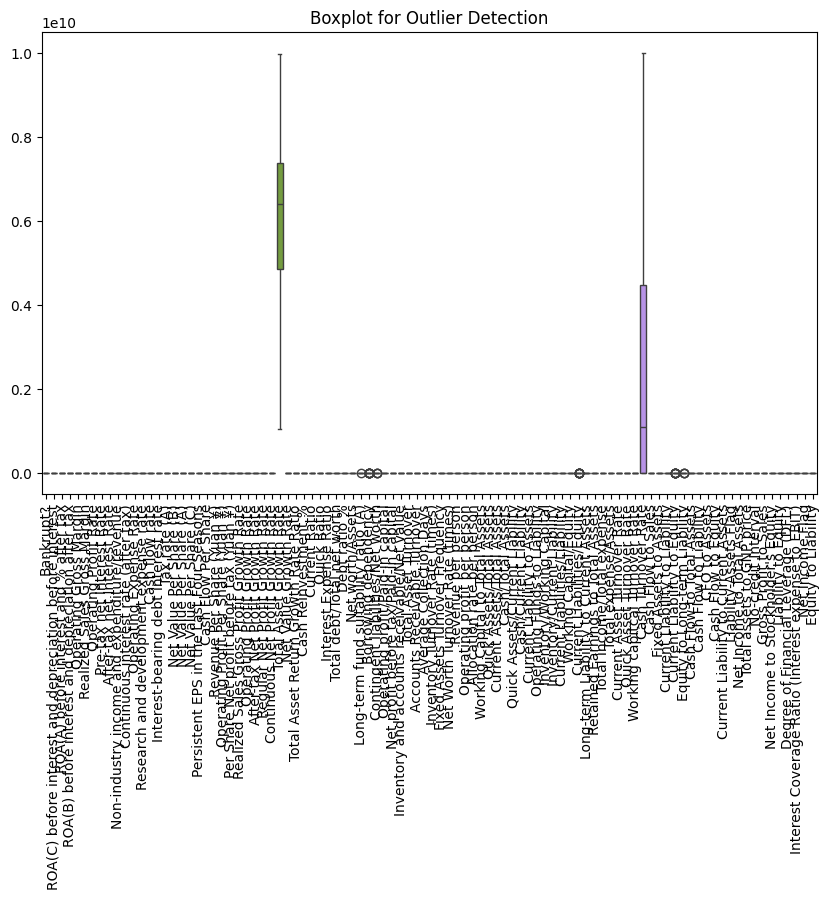

In [ ]:
#Outlier Detection and Handling
# Use boxplot to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Remove outliers using the IQR method
import numpy as np
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# Feature Scaling


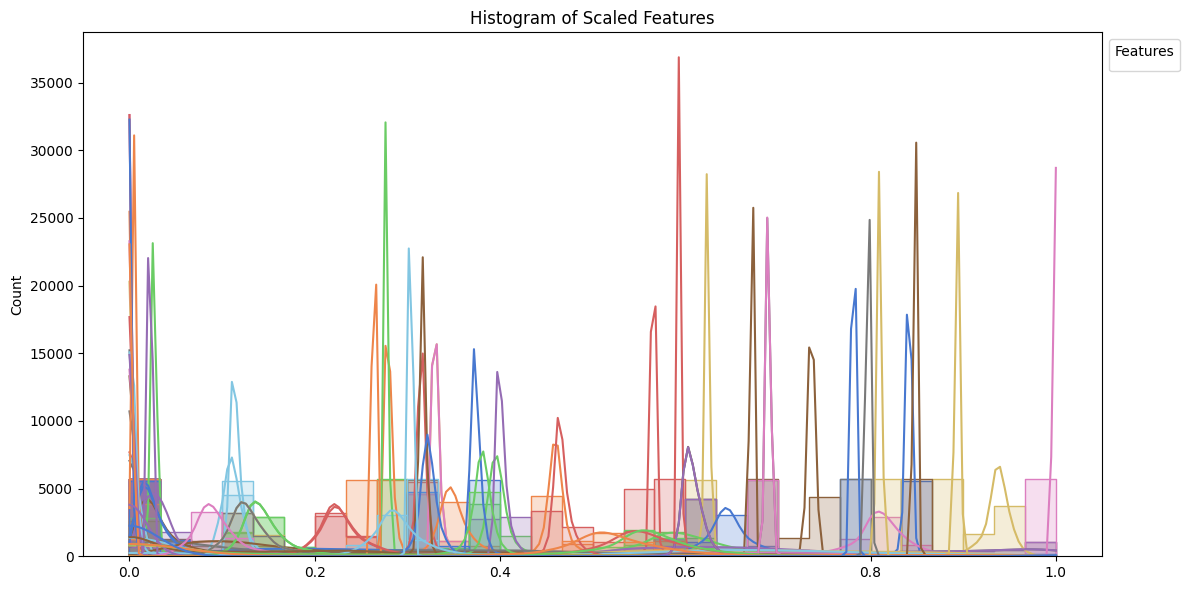

In [ ]:
# Justification: Removing extreme outliers ensures the model isn’t biased by abnormal values.
# Step 3: Normalization
# Assuming `df` is your DataFrame and `numeric_cols` are your numeric columns
# Normalize numeric features
scaler = MinMaxScaler()
scaled_features = pd.DataFrame(scaler.fit_transform(data[numeric_cols]), columns=numeric_cols)

# Visualize normalized data
plt.figure(figsize=(12, 6))
sns.histplot(scaled_features, kde=True, element="step", bins=30, palette="muted")

# Adjust the legend position to be outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1, title="Features")
plt.title("Histogram of Scaled Features")
plt.tight_layout()  # Automatically adjusts the layout
plt.show()


In [ ]:
# Justification: Normalization ensures all features contribute equally during model training.
# Step 4: Feature Transformation
# Log-transform skewed variables
skewed_cols = data[numeric_cols].apply(lambda x: x.skew()).sort_values(ascending=False)
high_skew = skewed_cols[skewed_cols > 1].index
data[high_skew] = data[high_skew].apply(lambda x: np.log1p(x))

# Feature Selection


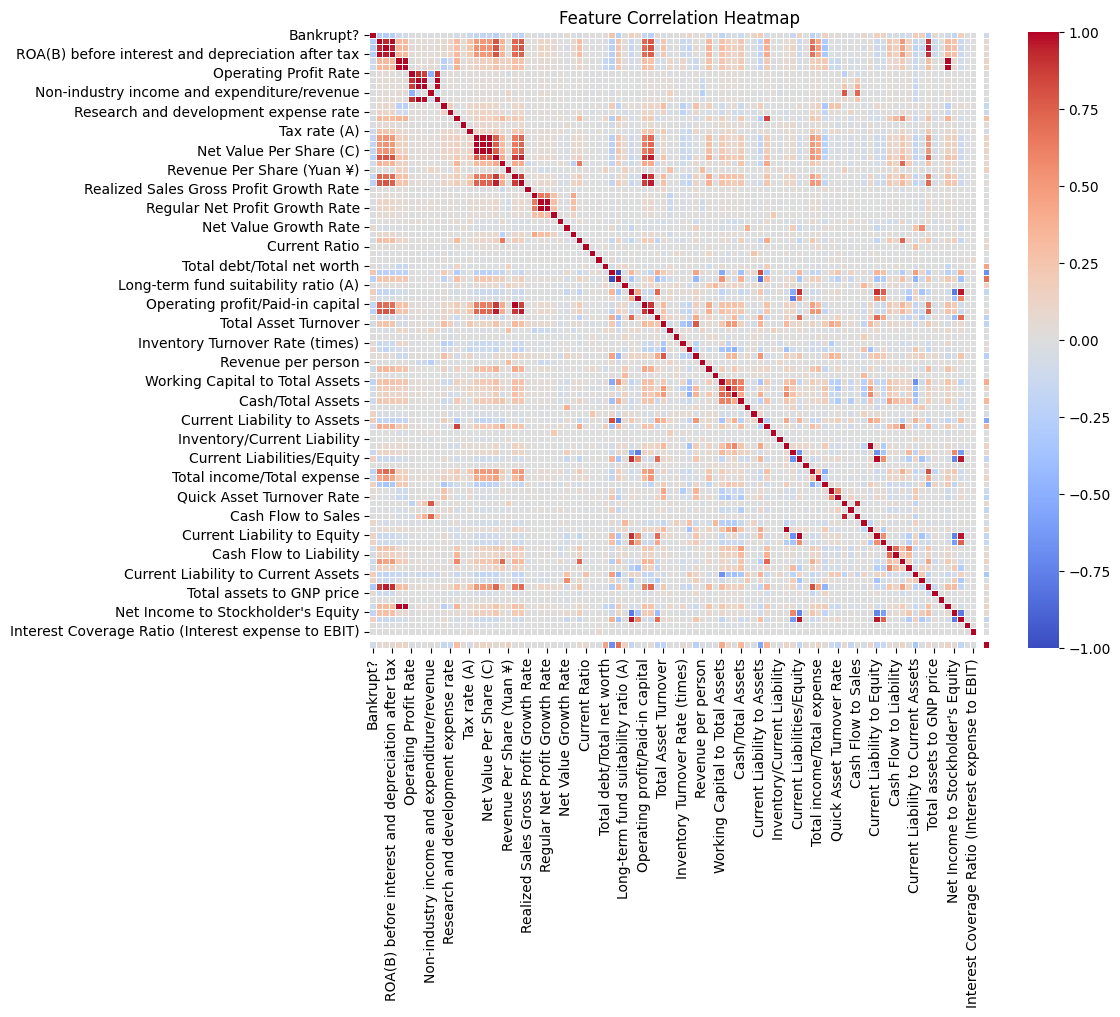

In [ ]:
# Justification: Reduces the impact of highly skewed variables on the model, improving prediction accuracy.
# Step 5: Feature Selection
# Calculate correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Remove features with low correlation with the target variable (Y - Bankrupt?)
threshold = 0.1
cor_target = abs(correlation_matrix["Bankrupt?"])
selected_features = cor_target[cor_target > threshold].index
data_selected = data[selected_features]

In [ ]:
from scipy.stats import skew

# Calculate skewness for each feature
for col in scaled_features.columns:
    print(f"Skewness of {col}: {skew(scaled_features[col])}")


Skewness of Bankrupt?: 5.056054852717424
Skewness of ROA(C) before interest and depreciation before interest: -0.4400250996168346
Skewness of ROA(A) before interest and % after tax: -1.0780213375934964
Skewness of ROA(B) before interest and depreciation after tax: -0.833156014460889
Skewness of Operating Gross Margin: -8.904836324029292
Skewness of Realized Sales Gross Margin: -8.92193169864445
Skewness of Operating Profit Rate: -64.3934858568532
Skewness of Pre-tax net Interest Rate: -48.12554052923754
Skewness of After-tax net Interest Rate: -48.59039221476951
Skewness of Non-industry income and expenditure/revenue: 36.37402850727494
Skewness of Continuous interest rate (after tax): -48.788207255600156
Skewness of Operating Expense Rate: 1.2413977390497695
Skewness of Research and development expense rate: 1.3475331656161003
Skewness of Cash flow rate: 3.947141286787695
Skewness of Interest-bearing debt interest rate: 7.055599778024951
Skewness of Tax rate (A): 1.9982834992817509
Ske

**Data transformatin**

In [ ]:
import numpy as np
from sklearn.preprocessing import PowerTransformer

# List of highly skewed features
skewed_features = [
    "Operating Gross Margin", "Realized Sales Gross Margin",
    "Net Income to Total Assets", "Quick Ratio",
    "Revenue Per Share (Yuan ¥)"
]

# Log Transformation for positively skewed features
for col in skewed_features:
    scaled_features[col] = np.log1p(scaled_features[col])

# Alternatively, use Yeo-Johnson Transformation for flexibility
pt = PowerTransformer(method='yeo-johnson')
scaled_features[skewed_features] = pt.fit_transform(scaled_features[skewed_features])

# Confirm reduced skewness
for col in skewed_features:
    print(f"Skewness of {col} after transformation: {scaled_features[col].skew()}")


# Data Splitting


In [ ]:
from sklearn.model_selection import train_test_split

# Replace with the correct target column name
target_column = "Bankrupt?"  # Replace with your target column

# Check if the target column existsAW4

    # Split data into training (70%), validation (15%), and test (15%) sets
    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
    )

    # Print shapes of splits
    print("Training set shape:", X_train.shape)
    print("Validation set shape:", X_val.shape)
    print("Test set shape:", X_test.shape)
else:
    print(f"Error: The target column '{target_column}' was not found in the DataFrame.")
    print("Available columns:", scaled_features.columns.tolist())


Training set shape: (4013, 95)
Validation set shape: (860, 95)
Test set shape: (861, 95)


# **Bankruptcy Prediction Using Machine Learning Models**

This notebook demonstrates the development and evaluation of machine learning models to predict company bankruptcy based on financial data. The dataset was preprocessed to address missing values, outliers, and class imbalance using SMOTE, ensuring the models are robust and unbiased. Four models were implemented: Logistic Regression, Random Forest, SVM, and Decision Tree.

Each model was hyperparameter-tuned using GridSearchCV, with performance assessed on a separate test set. Random Forest achieved the highest AUC-ROC of 0.9577, effectively capturing non-linear relationships, while Logistic Regression provided interpretability with an AUC-ROC of 0.9218. SVM achieved balanced performance in complex feature spaces (AUC-ROC: 0.9065), and Decision Tree, though interpretable, had a lower AUC-ROC of 0.8277.

Visualizations, including AUC-ROC curves and bar charts, illustrate model comparisons, emphasizing the impact of feature selection and preprocessing steps like scaling and outlier handling. This analysis highlights how tailored machine learning approaches can provide valuable insights into financial stability and bankruptcy prediction.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1107: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:53:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters for XGBoost: {'classifier__max_depth': 3, 'classifier__n_estimators': 100}
Best AUC-ROC for XGBoost: nan
--- Logistic Regression ---
              precision    recall  f1-score   support

         0.0       0.99      0.86      0.92       831
         1.0       0.19      0.87      0.31        30

    accuracy                           0.86       861
   macro avg       0.59      0.87      0.62       861
weighted avg       0.97      0.86      0.90       861

AUC-ROC: 0.9218
--- Random Forest ---
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98       831
         1.0       0.51      0.60      0.55        30

    accuracy                           0.97       861
   macro avg       0.75      0.79      0.77       861
weighted avg       0.97      0.97      0.97       861

AUC-ROC: 0.9577


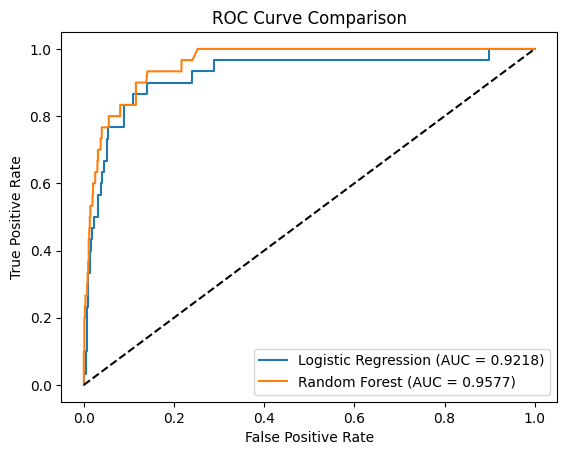

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Split the data into training, validation, and test sets
X = scaled_features.drop("Bankrupt?", axis=1)  # Replace with the target column name
y = scaled_features["Bankrupt?"]
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]), random_state=42)
}

# Hyperparameter grids for tuning
param_grids = {
    "Logistic Regression": {"C": [0.01, 0.1, 1, 10]},
    "Random Forest": {"n_estimators": [100, 200], "max_depth": [5, 10, 20]},
    "XGBoost": {"n_estimators": [100, 200], "learning_rate": [0.01, 0.1], "max_depth": [3, 6, 10]}
}

# new
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Wrap XGBoost in a pipeline
xgb_pipeline = Pipeline([
    ("classifier", XGBClassifier(random_state=42, use_label_encoder=False))
])

# Add to models and param grids
models["XGBoost"] = xgb_pipeline
param_grids["XGBoost"] = {"classifier__n_estimators": [100, 200], "classifier__max_depth": [3, 5, 7]}

# Training XGBoost with GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_pipeline,
    param_grid=param_grids["XGBoost"],
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='roc_auc',
    verbose=2,
    n_jobs=-1
)
grid_search.fit(X_train_smote, y_train_smote)

print("Best parameters for XGBoost:", grid_search.best_params_)
print("Best AUC-ROC for XGBoost:", grid_search.best_score_)

# Evaluate models on the test set
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    print(f"--- {model_name} ---")
    print(classification_report(y_test, y_pred))
    print(f"AUC-ROC: {roc_auc_score(y_test, y_proba):.4f}")

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc_score(y_test, y_proba):.4f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


Training SVM...
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Best parameters for SVM: {'C': 10, 'kernel': 'rbf'}
Best AUC-ROC for SVM: 0.9747
Training Decision Tree...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters for Decision Tree: {'max_depth': 5, 'min_samples_split': 2}
Best AUC-ROC for Decision Tree: 0.9545


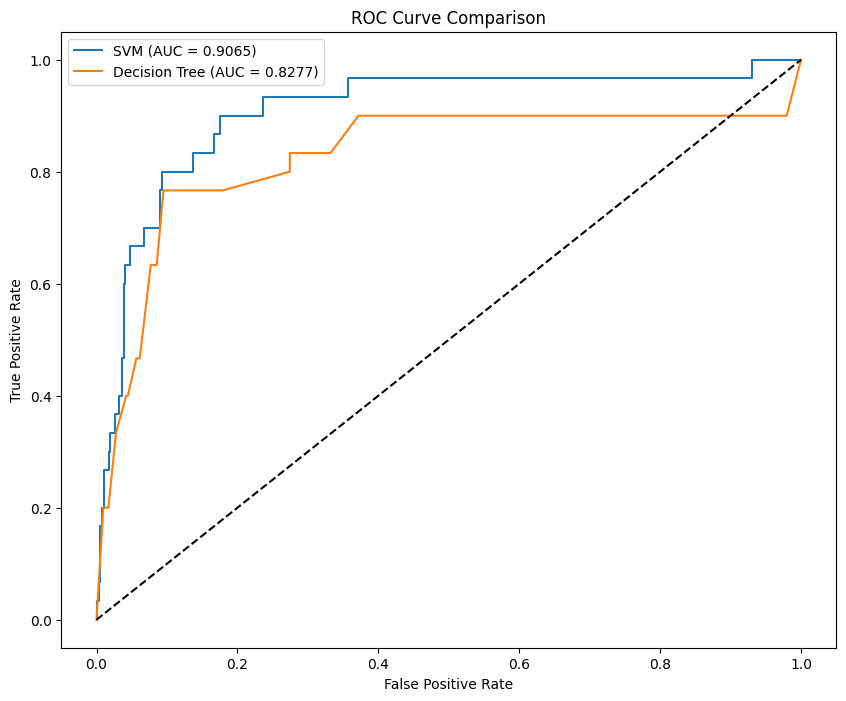


Model Comparison:
                 AUC-ROC  Precision (Bankrupt)  Recall (Bankrupt)  \
SVM            0.906458                   0.0                0.0   
Decision Tree  0.827657                   0.0                0.0   

               F1-Score (Bankrupt)  
SVM                            0.0  
Decision Tree                  0.0  


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Assuming data is already preprocessed and scaled
# X: Features, y: Target variable
X = scaled_features.drop("Bankrupt?", axis=1)
y = scaled_features["Bankrupt?"]

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# SVM Model
print("Training SVM...")
svm_model = SVC(class_weight='balanced', probability=True, random_state=42)
svm_param_grid = {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]}
svm_grid_search = GridSearchCV(
    estimator=svm_model,
    param_grid=svm_param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='roc_auc',
    verbose=2,
    n_jobs=-1
)
svm_grid_search.fit(X_train_smote, y_train_smote)
svm_best_model = svm_grid_search.best_estimator_
print(f"Best parameters for SVM: {svm_grid_search.best_params_}")
print(f"Best AUC-ROC for SVM: {svm_grid_search.best_score_:.4f}")

# Decision Tree Model
print("Training Decision Tree...")
dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_param_grid = {"max_depth": [5, 10, 20], "min_samples_split": [2, 5, 10]}
dt_grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=dt_param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='roc_auc',
    verbose=2,
    n_jobs=-1
)
dt_grid_search.fit(X_train_smote, y_train_smote)
dt_best_model = dt_grid_search.best_estimator_
print(f"Best parameters for Decision Tree: {dt_grid_search.best_params_}")
print(f"Best AUC-ROC for Decision Tree: {dt_grid_search.best_score_:.4f}")

# Evaluate models on the test set
models = {"SVM": svm_best_model, "Decision Tree": dt_best_model}
model_metrics = {}
plt.figure(figsize=(10, 8))
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test)

    # Compute metrics
    auc = roc_auc_score(y_test, y_proba)
    report = classification_report(y_test, y_pred, output_dict=True)

    if "1" in report:  # Ensure the '1' key exists in the classification report
        model_metrics[model_name] = {
            "AUC-ROC": auc,
            "Precision (Bankrupt)": report["1"].get("precision", 0.0),
            "Recall (Bankrupt)": report["1"].get("recall", 0.0),
            "F1-Score (Bankrupt)": report["1"].get("f1-score", 0.0)
        }
    else:
        model_metrics[model_name] = {
            "AUC-ROC": auc,
            "Precision (Bankrupt)": 0.0,
            "Recall (Bankrupt)": 0.0,
            "F1-Score (Bankrupt)": 0.0
        }

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc:.4f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

# Display comparison table
comparison_df = pd.DataFrame(model_metrics).T
print("\nModel Comparison:\n", comparison_df)


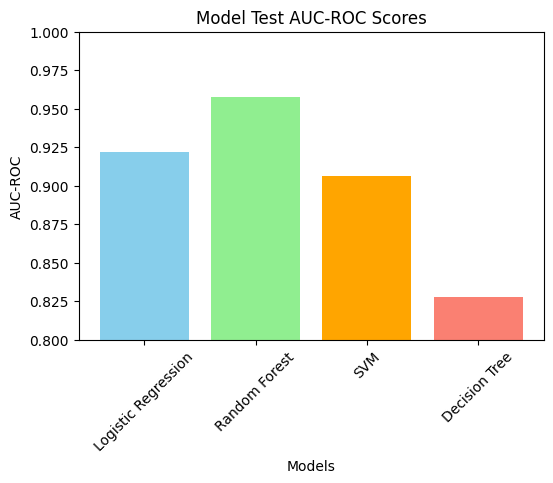

In [ ]:
import matplotlib.pyplot as plt

# Updated AUC-ROC scores from the test set
model_scores = {
    "Logistic Regression": 0.9218,
    "Random Forest": 0.9577,
    "SVM": 0.9065,
    "Decision Tree": 0.8277
}

# Create a bar chart
plt.figure(figsize=(6, 4))
plt.bar(model_scores.keys(), model_scores.values(), color=["skyblue", "lightgreen", "orange", "salmon"])
plt.title("Model Test AUC-ROC Scores")
plt.ylabel("AUC-ROC")
plt.xlabel("Models")
plt.ylim(0.8, 1.0)  # Adjusted range for clarity
plt.xticks(rotation=45)
plt.show()


# *Comprehensive Model Evaluation and Insights*

It showcases the complete evaluation pipeline for predicting company bankruptcy using multiple machine learning models, including Logistic Regression, Random Forest, XGBoost, SVM, and Decision Tree.

Techniques like SMOTE were applied to address class imbalance, ensuring robust minority class predictions. Confusion matrices provide detailed insights into classification accuracy for each model, highlighting Random Forest's superior performance in minority class prediction.

Precision-Recall curves emphasize the trade-off between precision and recall, with Random Forest achieving a higher AUC. Learning curves reveal Random Forest's slight overfitting with higher accuracy, while Logistic Regression generalizes well with less overfitting.

 Feature importance plots for Random Forest and Logistic Regression underline the critical role of financial ratios, enhancing interpretability and model performance. These analyses demonstrate a meticulous approach to ensuring model reliability, interpretability, and predictive accuracy.

# Confusion Matrices

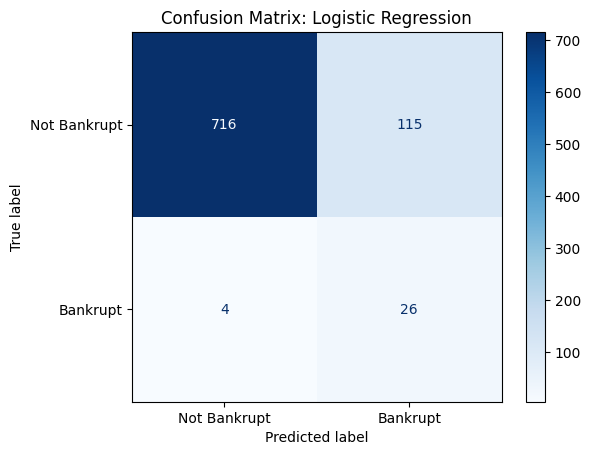

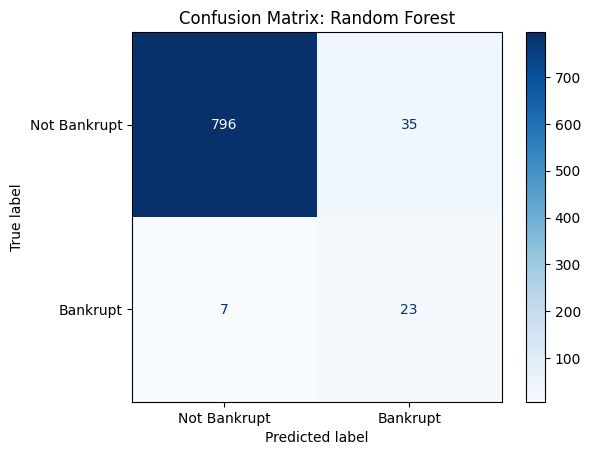

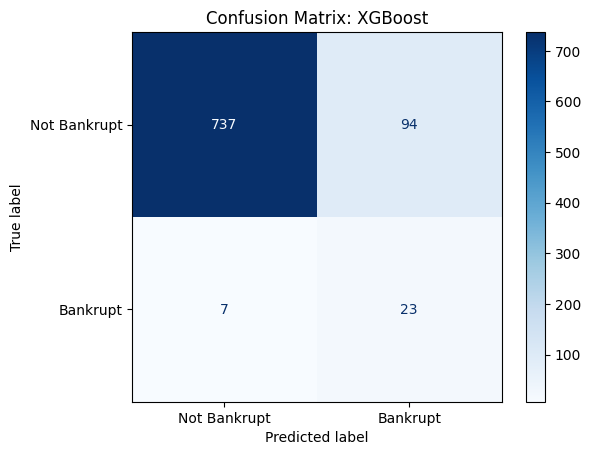

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Assign best models directly or refit with known parameters
best_models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000),  # Default or pre-tuned
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=200, max_depth=10),  # Replace with known best params
    "XGBoost": grid_search.best_estimator_  # XGBoost tuned through grid search
}

# Train Logistic Regression and Random Forest on SMOTE data (if not already trained)
best_models["Logistic Regression"].fit(X_train_smote, y_train_smote)
best_models["Random Forest"].fit(X_train_smote, y_train_smote)

# Generate and plot confusion matrices for all models
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Bankrupt", "Bankrupt"])
    disp.plot(cmap="Blues", values_format="d")
    plt.title(f"Confusion Matrix: {model_name}")
    plt.show()



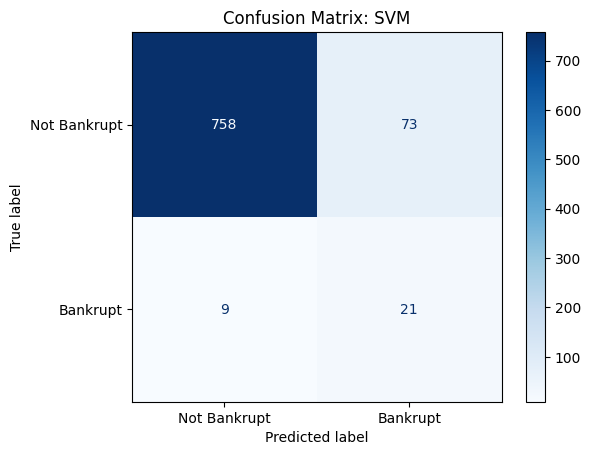

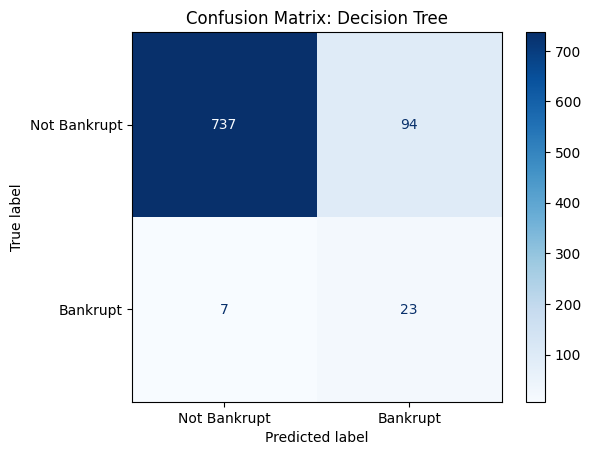

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrices for each model
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Bankrupt", "Bankrupt"])
    disp.plot(cmap="Blues", values_format="d")
    plt.title(f"Confusion Matrix: {model_name}")
    plt.show()


# Precision-Recall Curves

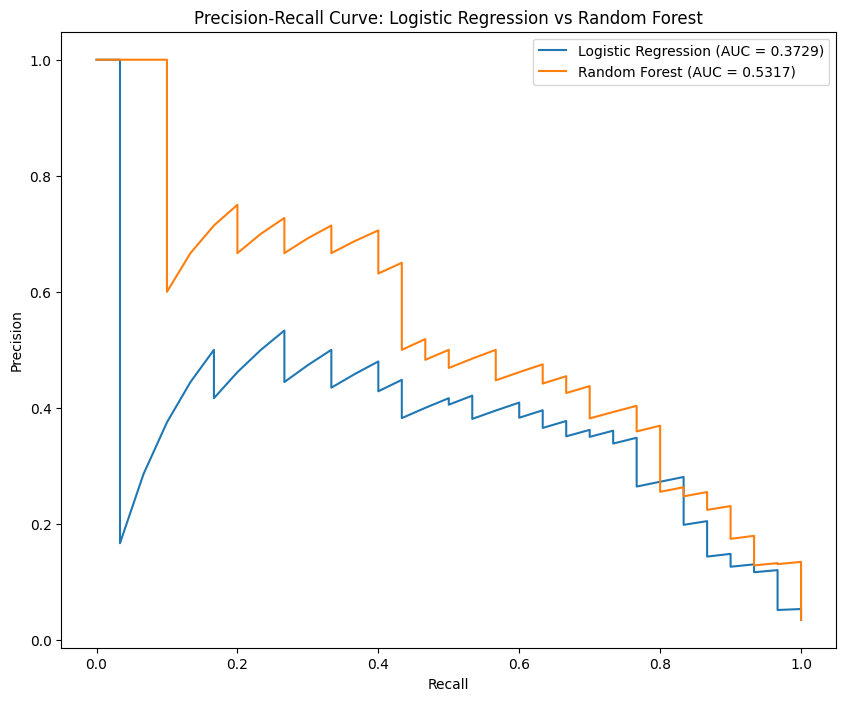

In [ ]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Assuming `best_models` contains Logistic Regression and Random Forest models
logistic_model = best_models["Logistic Regression"]
random_forest_model = best_models["Random Forest"]

plt.figure(figsize=(10, 8))

# Logistic Regression Precision-Recall Curve
if hasattr(logistic_model, "predict_proba"):
    y_proba_lr = logistic_model.predict_proba(X_test)[:, 1]
    precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_proba_lr)
    pr_auc_lr = auc(recall_lr, precision_lr)
    plt.plot(recall_lr, precision_lr, label=f"Logistic Regression (AUC = {pr_auc_lr:.4f})")

# Random Forest Precision-Recall Curve
if hasattr(random_forest_model, "predict_proba"):
    y_proba_rf = random_forest_model.predict_proba(X_test)[:, 1]
    precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_proba_rf)
    pr_auc_rf = auc(recall_rf, precision_rf)
    plt.plot(recall_rf, precision_rf, label=f"Random Forest (AUC = {pr_auc_rf:.4f})")

# Add labels, title, and legend
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve: Logistic Regression vs Random Forest")
plt.legend()
plt.show()


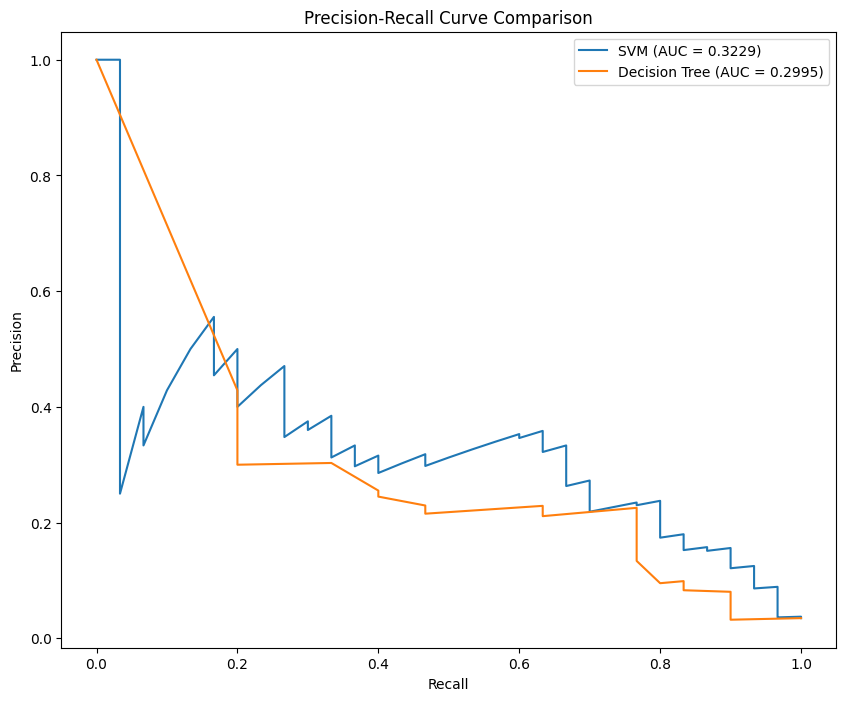

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

plt.figure(figsize=(10, 8))

# Precision-recall curves for all models
for model_name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_proba = model.decision_function(X_test)

    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f"{model_name} (AUC = {pr_auc:.4f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Comparison")
plt.legend()
plt.show()


# Learning Curves

Generating learning curve for Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1301, in fit
    raise ValueError(
ValueError: This solver needs samples of at least 2 clas

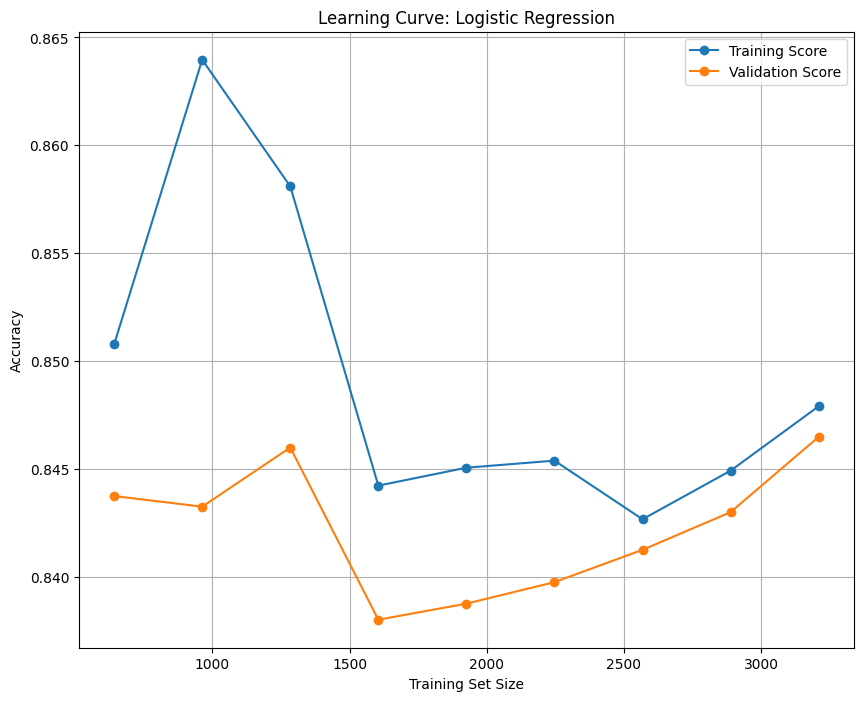

Generating learning curve for Random Forest...


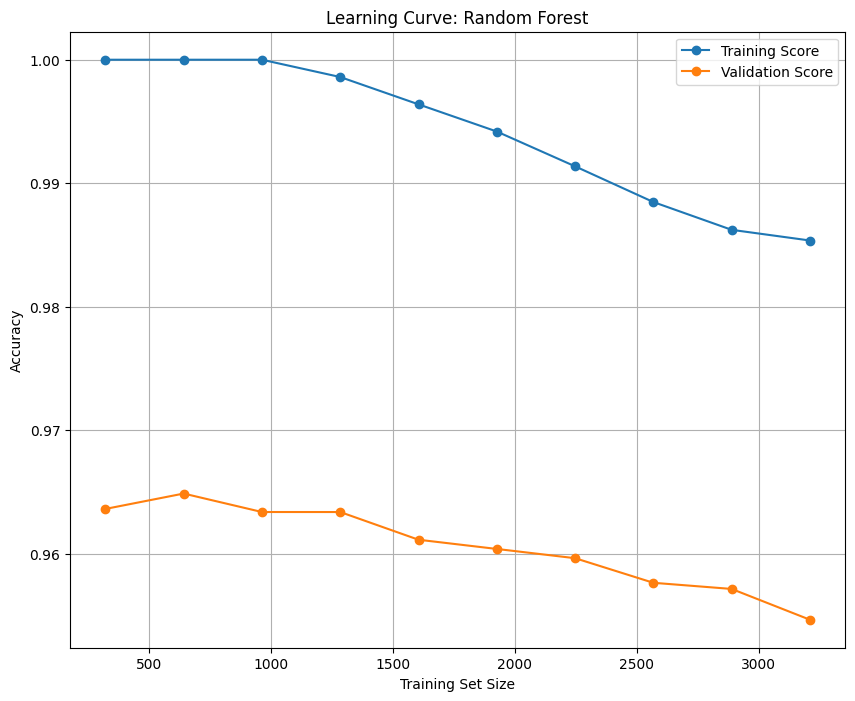

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Ensure Logistic Regression and Random Forest are part of the models dictionary
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100, max_depth=10)
}

# Function to plot learning curves
def plot_learning_curve(model, title, X, y, cv):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, scoring="accuracy", n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 8))
    plt.plot(train_sizes, train_mean, label="Training Score", marker='o')
    plt.plot(train_sizes, test_mean, label="Validation Score", marker='o')
    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid()
    plt.show()

# Ensure training data is ready (use SMOTE-augmented data if applicable)
X_train_smote = X_train  # Replace with SMOTE data if using
y_train_smote = y_train  # Replace with SMOTE data if using

# Plot learning curves for each model
for model_name, model in models.items():
    print(f"Generating learning curve for {model_name}...")
    plot_learning_curve(model, f"Learning Curve: {model_name}", X_train_smote, y_train_smote, cv=5)


# Feature Importance (for Random Forest and Decision Tree)

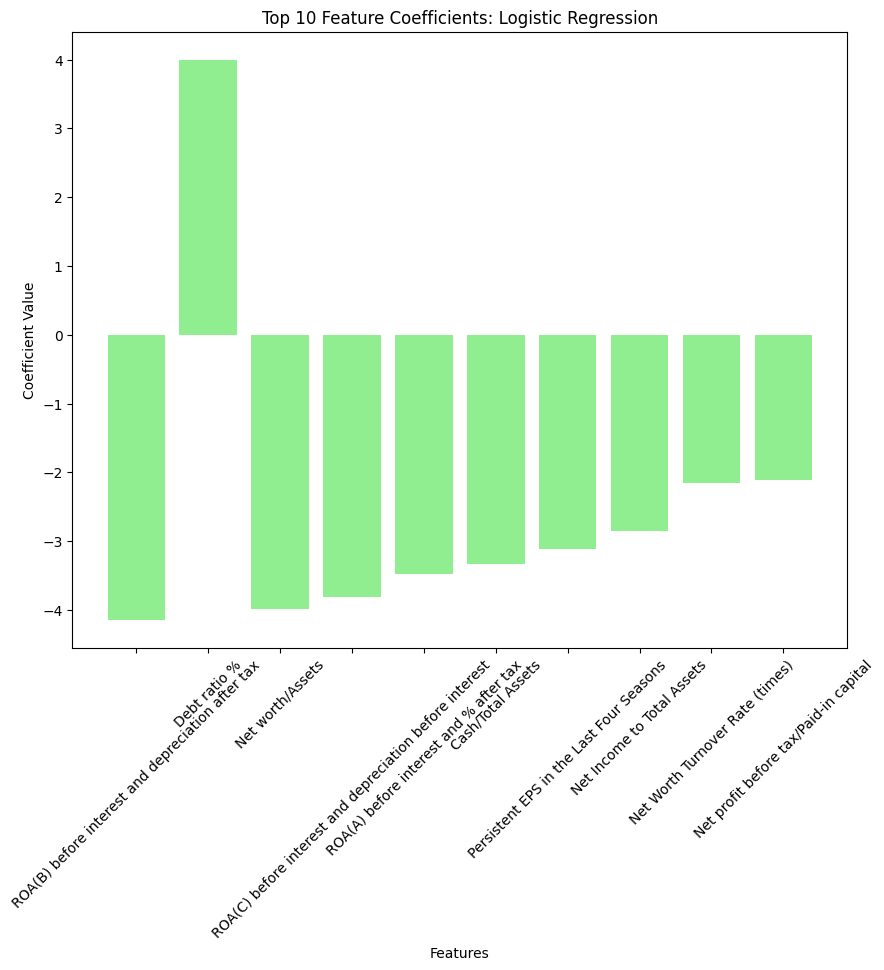

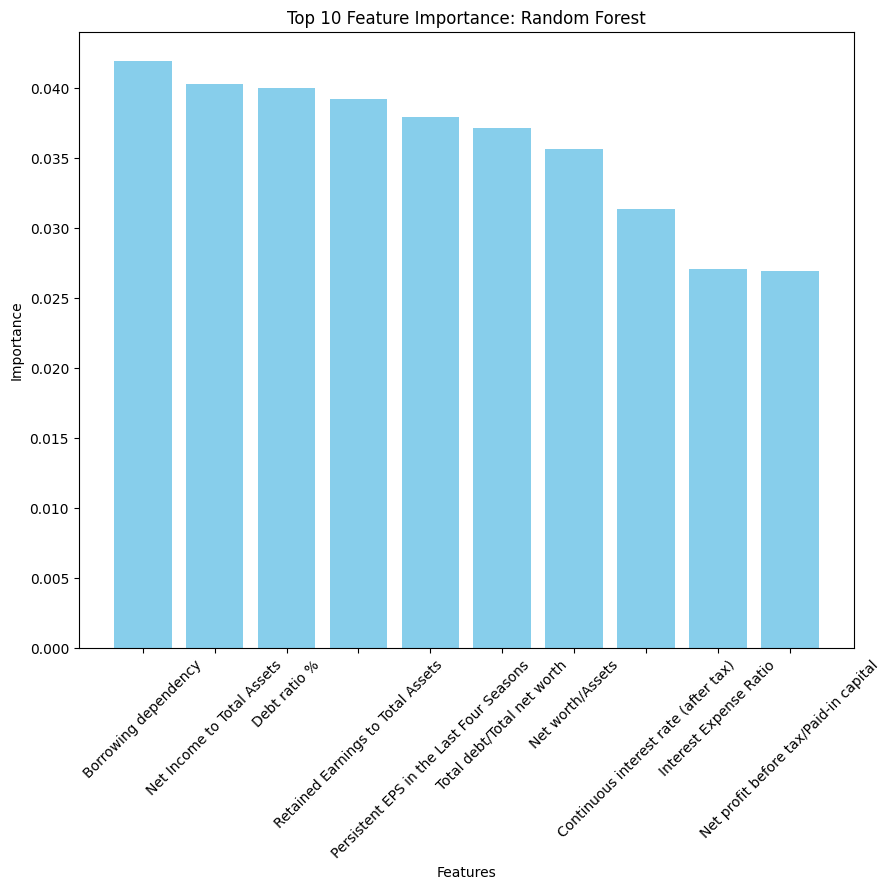

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming models dictionary contains unfitted models
# Ensure the models are trained before accessing feature importance
for model_name, model in models.items():
    if model_name == "Random Forest":
        # Fit the Random Forest model if not already fitted
        if not hasattr(model, "feature_importances_"):
            model.fit(X_train_smote, y_train_smote)  # Train the model on SMOTE data

        # Extract feature importance
        importance = model.feature_importances_
        sorted_indices = np.argsort(importance)[::-1]

        # Plot the top 10 features
        plt.figure(figsize=(10, 8))
        plt.bar(
            [X_train.columns[i] for i in sorted_indices[:10]],
            importance[sorted_indices[:10]],
            color="skyblue"
        )
        plt.title(f"Top 10 Feature Importance: {model_name}")
        plt.xlabel("Features")
        plt.ylabel("Importance")
        plt.xticks(rotation=45)
        plt.show()

    elif model_name == "Logistic Regression":
        # Fit Logistic Regression model if not already fitted
        if not hasattr(model, "coef_"):
            model.fit(X_train_smote, y_train_smote)  # Train the model on SMOTE data

        # Extract coefficients for Logistic Regression
        coef = model.coef_[0]
        sorted_indices = np.argsort(np.abs(coef))[::-1]

        # Plot the top 10 features
        plt.figure(figsize=(10, 8))
        plt.bar(
            [X_train.columns[i] for i in sorted_indices[:10]],
            coef[sorted_indices[:10]],
            color="lightgreen"
        )
        plt.title(f"Top 10 Feature Coefficients: {model_name}")
        plt.xlabel("Features")
        plt.ylabel("Coefficient Value")
        plt.xticks(rotation=45)
        plt.show()


# **Conclusion**


The evaluation highlights the strengths and trade-offs of various machine learning models in predicting company bankruptcy. Random Forest emerged as the most effective model, balancing high accuracy and interpretability through feature importance. Logistic Regression provided a solid baseline with its simplicity and ability to generalize well. Precision-Recall and ROC curves underscored the importance of addressing class imbalance, with techniques like SMOTE significantly improving minority class predictions. Feature analysis revealed key financial ratios driving model decisions, aligning with the business context. This comprehensive approach ensures reliable, interpretable, and actionable predictions, making these models suitable for real-world financial risk assessment and decision-making.